In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [1]:
import sys
sys.path.append('../drlfoil/')

In [1]:
import gymnasium as gym
import drlfoil
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [12]:
env = gym.make('AirfoilEnv-v0', n_params=8, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(8), -0.1*np.ones(8), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.5, efficiency_param = 1, cl_wide = 20, render_mode="human",
                    n_boxes=1,
                    reynolds = 1e7)
model = PPO.load("logmodels/110524/110524_3M_OneBox_TestRandomAirfoil_Seed0.1_ReMin1e5_ReMax5e7_CLmax1.6/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [14]:
# Enjoy trained agent
vec_env = model.get_env()
obs, _ = env.reset()

Step: 0, Action: [ 1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25
 -0.25 -0.25 -0.25 -0.25  0.15]


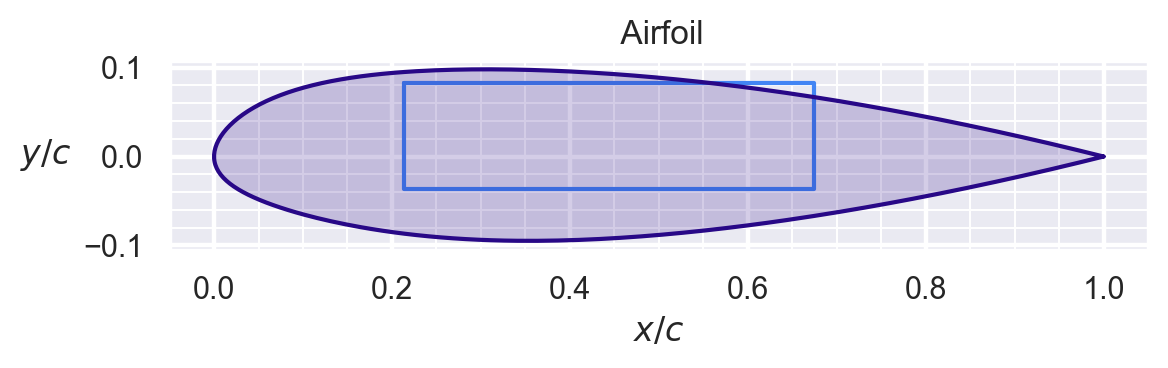

Step: 1, Action: [ 1.          1.          1.          1.          1.          0.52282834
  1.          1.         -1.          0.18044403  1.          1.
 -1.         -1.         -1.         -1.          1.        ], Reward: 39.95948923378511, Done: False, Info: {'step': 2, 'efficiency': 43.47143342834245, 'cl': 0.43510090608767005}
Obs: [ 0.4         0.4         0.4         0.4         0.4         0.32842425
  0.4         0.4        -0.4        -0.2229334  -0.1        -0.1
 -0.4        -0.4        -0.4        -0.4         0.3       ]


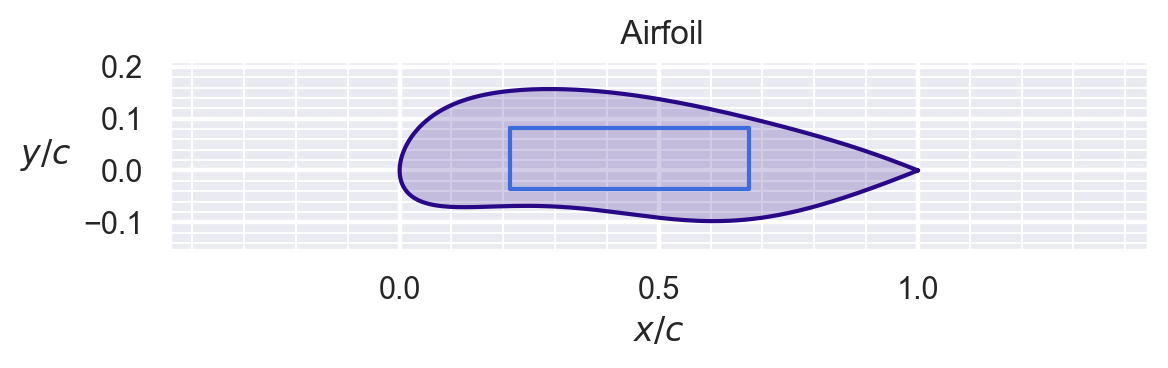

Step: 2, Action: [-0.09092998 -1.          1.          1.          1.         -0.34606957
  1.         -0.0485085   0.68801427  0.10876754 -0.23872739 -0.6426493
  0.42869934  1.          0.14730504 -1.         -0.08067606], Reward: 63.042147363833784, Done: False, Info: {'step': 3, 'efficiency': 63.14714973722743, 'cl': 0.4908780361395939}
Obs: [ 0.38636053  0.25        0.55        0.55        0.55        0.27651381
  0.55        0.39272374 -0.29679787 -0.20661826 -0.13580911 -0.1963974
 -0.33569512 -0.25       -0.37790427 -0.55        0.2878986 ]


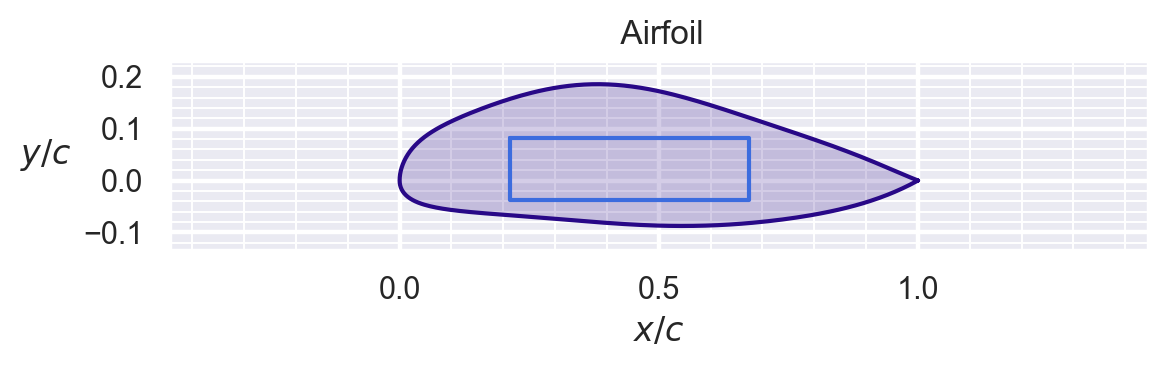

Step: 3, Action: [ 1.          1.          0.15233555  0.027226   -0.58630306  1.
 -1.          1.         -0.23270357 -0.15319574 -1.          0.7339443
 -0.1631276   0.5376203  -0.6115482   0.75008833  0.6470718 ], Reward: 48.690540583134194, Done: False, Info: {'step': 4, 'efficiency': 52.24479304611476, 'cl': 0.4406470478506761}
Obs: [ 0.5363605   0.4         0.57285035  0.55408394  0.46205455  0.42651382
  0.4         0.5427237  -0.3317034  -0.22959763 -0.28580913 -0.08630575
 -0.36016425 -0.16935696 -0.4696365  -0.43748677  0.38495937]


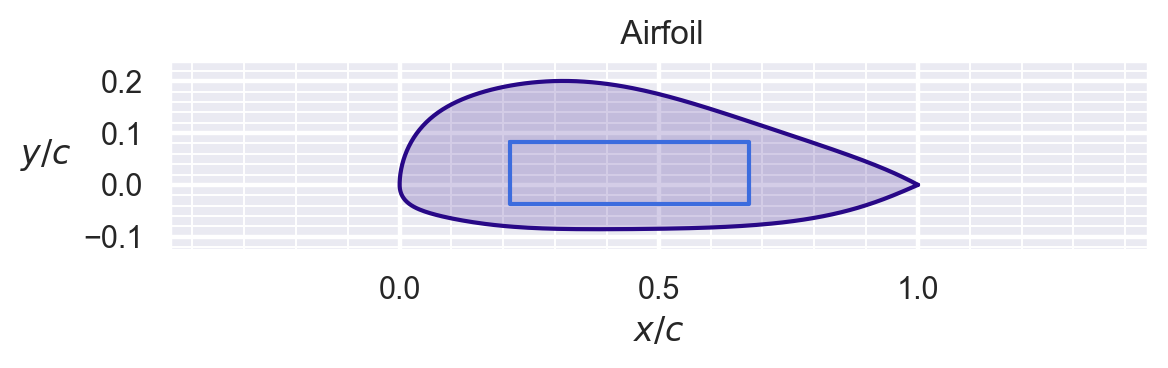

Step: 4, Action: [-1.         -1.         -0.8028838  -0.20055468  0.87068224 -1.
  1.         -1.         -0.23697081  0.31113762  1.         -1.
  1.         -1.          1.         -1.         -0.61473227], Reward: 67.58726349406308, Done: False, Info: {'step': 5, 'efficiency': 68.00918670409537, 'cl': 0.517639783437357}
Obs: [ 0.38636053  0.25        0.45241776  0.5240007   0.5926569   0.27651381
  0.55        0.39272374 -0.36724904 -0.18292698 -0.13580911 -0.23630576
 -0.21016425 -0.31935695 -0.3196365  -0.58748674  0.29274952]


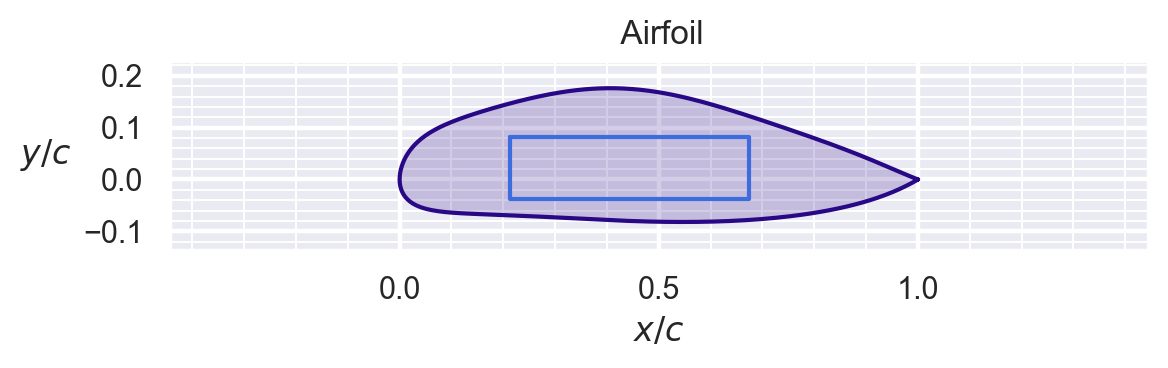

Step: 5, Action: [ 1.          1.          0.9593473   0.03094663 -0.81072307  1.
 -1.          1.          0.49011138 -0.06558251 -1.          1.
 -0.88709855  0.6731437  -1.          1.          0.444636  ], Reward: 47.9221553276846, Done: False, Info: {'step': 6, 'efficiency': 51.437888240050235, 'cl': 0.440503321188499}
Obs: [ 0.5363605   0.4         0.59631985  0.5286427   0.47104844  0.42651382
  0.4         0.5427237  -0.29373232 -0.19276436 -0.28580913 -0.08630575
 -0.34322903 -0.2183854  -0.4696365  -0.43748677  0.35944492]


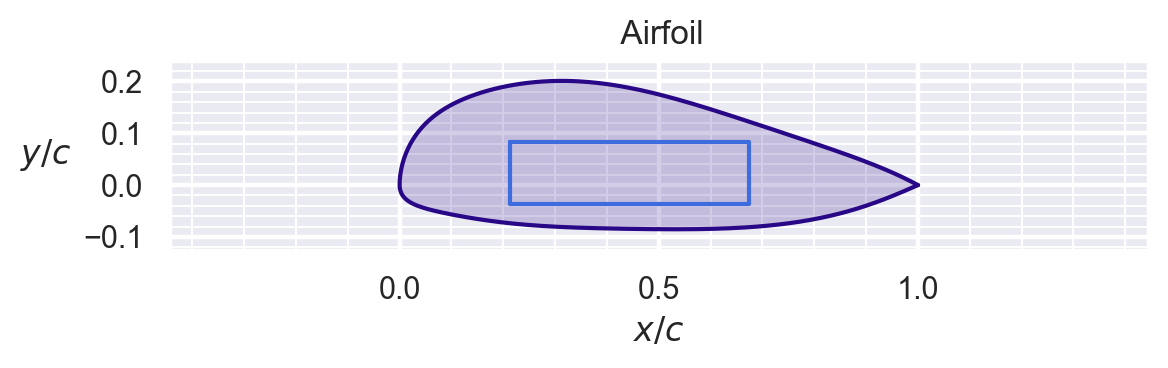

Step: 6, Action: [-1.         -1.         -0.87464565 -0.09611046  0.7186759  -1.
  1.         -1.         -0.52816606  0.1731799   1.         -1.
  1.         -1.          1.         -1.         -0.61791164], Reward: 67.93394273852653, Done: False, Info: {'step': 7, 'efficiency': 70.01443624263715, 'cl': 0.5388366129496593}
Obs: [ 0.38636053  0.25        0.46512303  0.51422614  0.57884985  0.27651381
  0.55        0.39272374 -0.37295723 -0.16678737 -0.13580911 -0.23630576
 -0.19322903 -0.3683854  -0.3196365  -0.58748674  0.26675817]


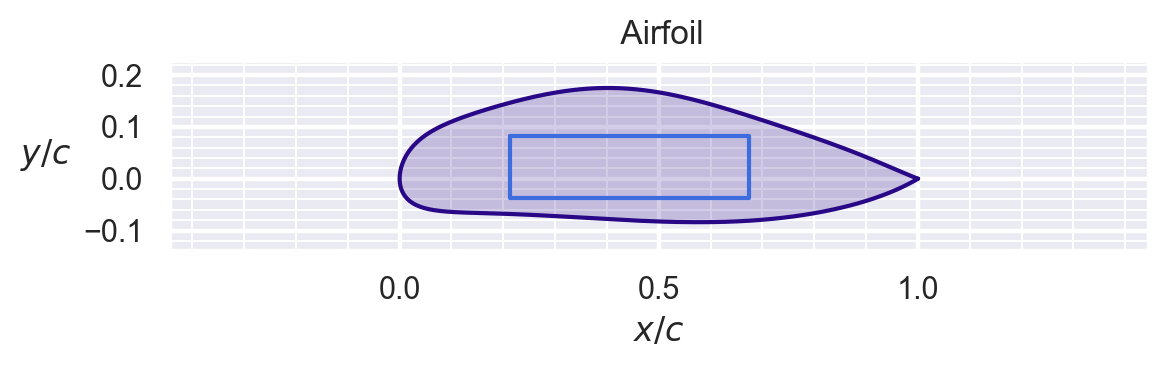

Step: 7, Action: [ 1.          1.          0.9296061   0.1604426  -0.76811713  1.
 -1.          1.          0.56484926 -0.21499547 -1.          1.
 -0.98231626  1.         -1.          1.          0.5077699 ], Reward: 48.15800319243291, Done: False, Info: {'step': 8, 'efficiency': 52.13164700893718, 'cl': 0.437037767529173}
Obs: [ 0.5363605   0.4         0.60456395  0.5382925   0.46363226  0.42651382
  0.4         0.5427237  -0.28822985 -0.1990367  -0.28580913 -0.08630575
 -0.34057647 -0.2183854  -0.4696365  -0.43748677  0.34292367]


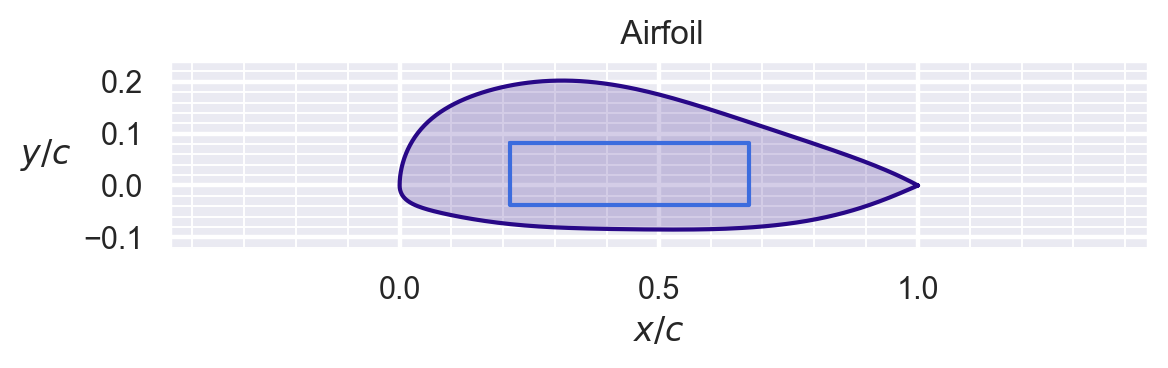

Step: 8, Action: [-1.         -1.         -0.94219893 -0.14405473  0.7518236  -1.
  1.         -1.         -0.57406473  0.1518654   1.         -1.
  1.         -1.          1.         -1.         -0.4924314 ], Reward: 67.72006974380466, Done: False, Info: {'step': 9, 'efficiency': 69.45099384236036, 'cl': 0.5355237893064948}
Obs: [ 0.38636053  0.25        0.4632341   0.5166843   0.5764058   0.27651381
  0.55        0.39272374 -0.37433955 -0.1762569  -0.13580911 -0.23630576
 -0.19057648 -0.3683854  -0.3196365  -0.58748674  0.26905894]


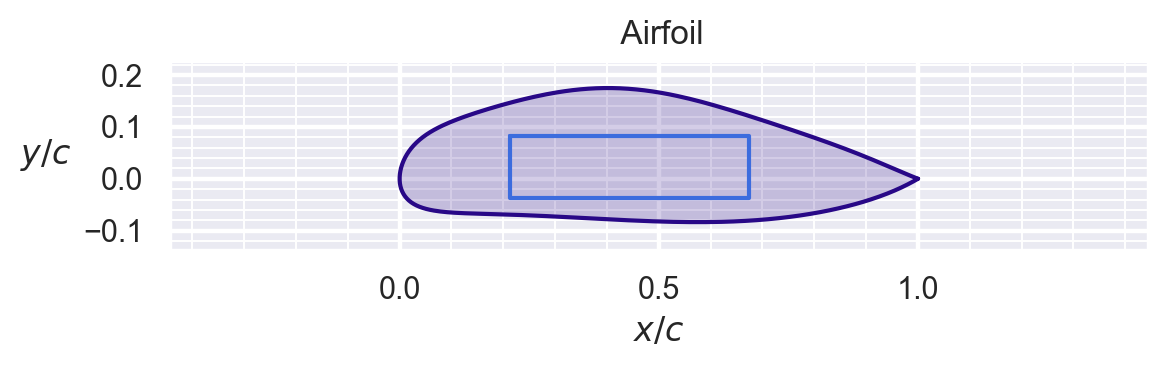

Step: 9, Action: [ 1.          1.          0.94225985  0.14195815 -0.75167304  1.
 -1.          1.          0.59693146 -0.16361395 -1.          1.
 -0.98091257  1.         -1.          1.          0.53971726], Reward: 47.98239217774424, Done: True, Info: {'step': 10, 'efficiency': 52.077262763108614, 'cl': 0.4360100303844753}
Obs: [ 0.5363605   0.4         0.6045731   0.53797805  0.46365485  0.42651382
  0.4         0.5427237  -0.28479984 -0.20079899 -0.28580913 -0.08630575
 -0.33771336 -0.2183854  -0.4696365  -0.43748677  0.35001653]


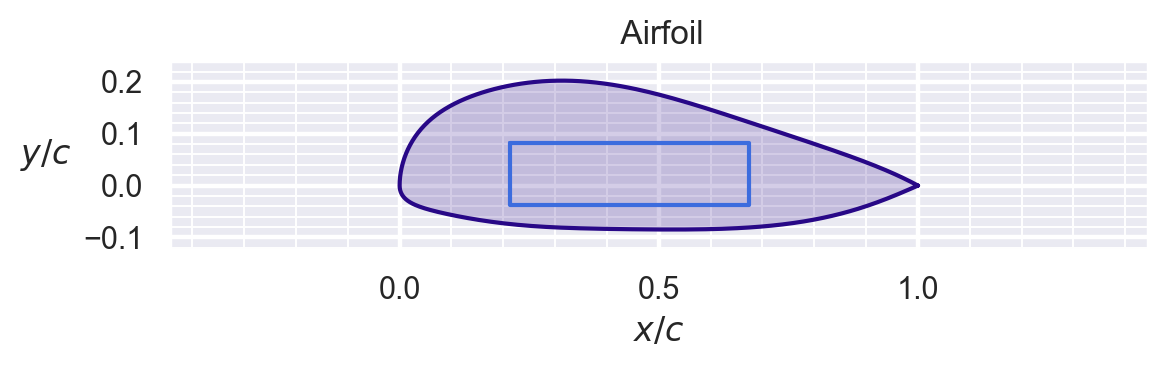

Step: 10, Action: [ 1.          1.          1.          1.          1.          1.
  1.          1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.08633099], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.25       -0.25       -0.25       -0.25       -0.25
 -0.25       -0.25       -0.25       -0.25       -0.01294965]


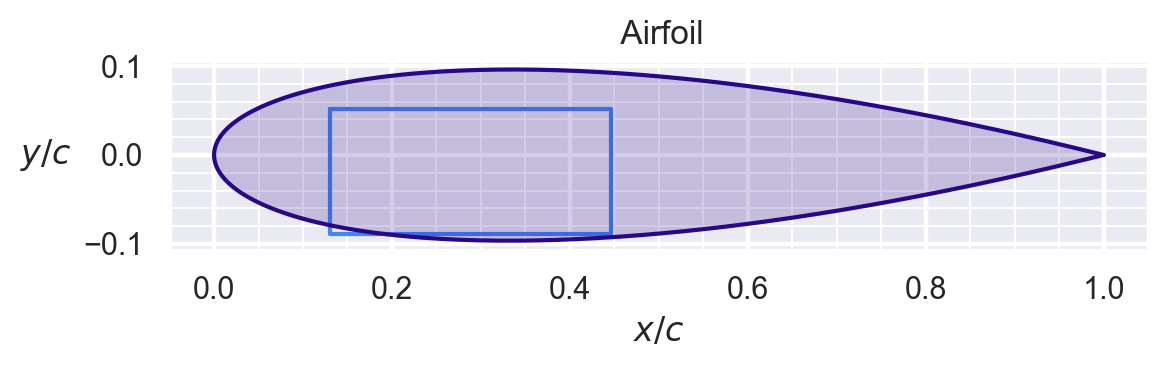

Step: 11, Action: [ 1.          1.          1.          1.          1.         -1.
  1.          1.         -1.         -0.49883223 -0.03181076  0.54318297
 -1.         -1.         -1.         -1.          1.        ], Reward: 13.075157852160602, Done: False, Info: {'step': 2, 'efficiency': 33.62660992866463, 'cl': 0.28267494012492056}
Obs: [ 0.4         0.4         0.4         0.4         0.4         0.1
  0.4         0.4        -0.4        -0.32482484 -0.25477162 -0.16852255
 -0.4        -0.4        -0.4        -0.4         0.13705036]


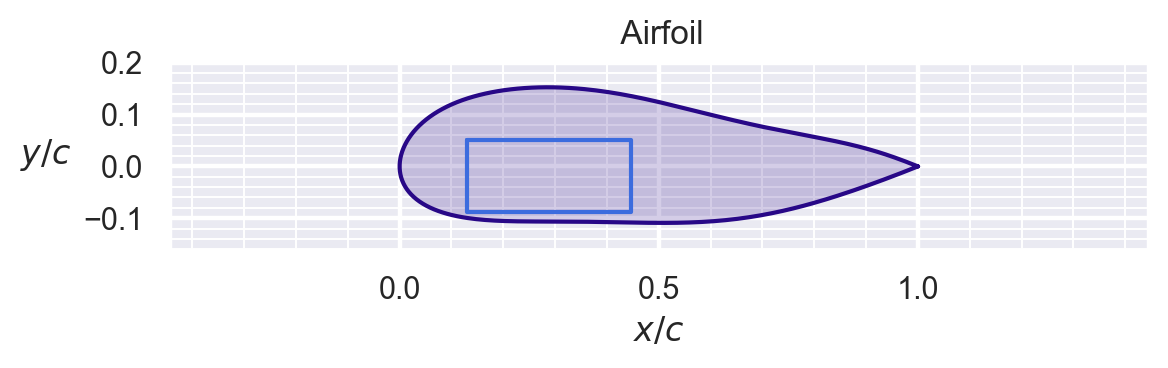

Step: 12, Action: [ 0.3767304  -0.9020331   1.          1.          1.         -1.
  1.         -1.         -1.         -0.16254377  0.26580057 -0.28952244
  0.36699626 -0.3250291  -0.505588   -1.          0.9261153 ], Reward: 55.10736908252916, Done: False, Info: {'step': 3, 'efficiency': 56.26609906149224, 'cl': 0.5322558198639653}
Obs: [ 0.4565096   0.26469505  0.55        0.55        0.55       -0.05
  0.55        0.25       -0.55       -0.34920642 -0.21490154 -0.21195093
 -0.34495056 -0.44875437 -0.4758382  -0.55        0.27596766]


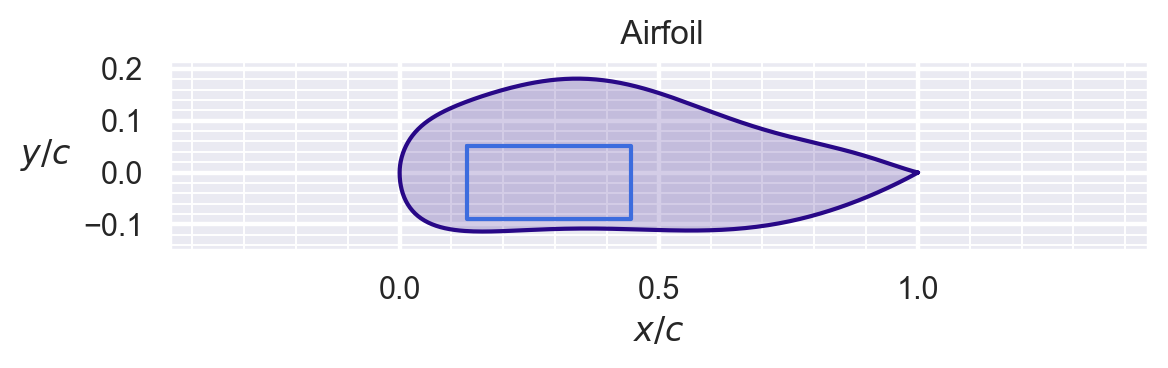

Step: 13, Action: [ 1.          1.          0.47145554  0.0200047  -0.56746745  1.
 -1.          1.          0.9455546  -0.08840819 -1.          0.9193946
  0.04410605  1.         -1.          0.8561231   0.55451393], Reward: 56.507950628457486, Done: False, Info: {'step': 4, 'efficiency': 57.334032509661846, 'cl': 0.5269379246294252}
Obs: [ 0.60650957  0.41469505  0.62071836  0.55300075  0.4648799   0.1
  0.4         0.4        -0.40816683 -0.36246765 -0.36490154 -0.07404172
 -0.33833465 -0.29875436 -0.6258382  -0.42158154  0.35914475]


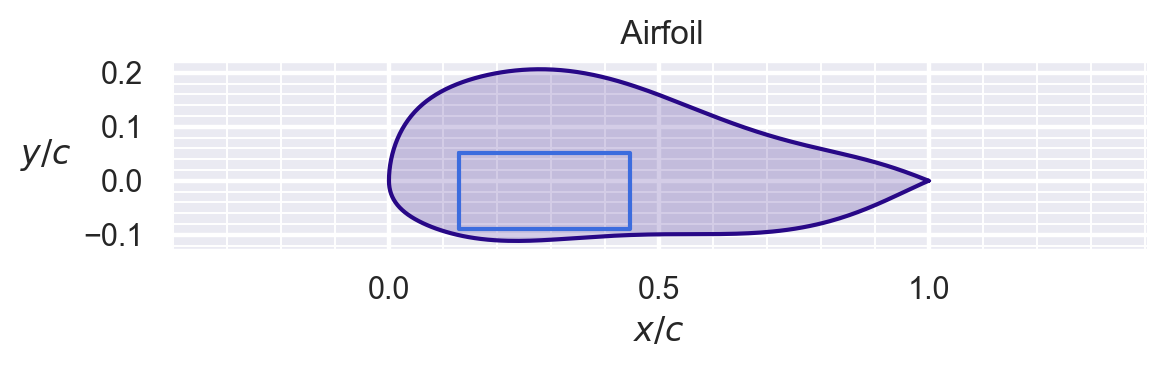

Step: 14, Action: [-1.         -1.         -0.7955613   0.18575047  0.91665214 -1.
  1.         -1.         -1.          0.03755042  1.         -1.
  1.         -0.54967207  1.         -1.         -0.8588637 ], Reward: 57.93404543087782, Done: False, Info: {'step': 5, 'efficiency': 57.965354143583795, 'cl': 0.5051974703198976}
Obs: [ 0.4565096   0.26469505  0.50138414  0.5808633   0.6023777  -0.05
  0.55        0.25       -0.5581668  -0.35683507 -0.21490154 -0.22404173
 -0.18833466 -0.3812052  -0.4758382  -0.57158154  0.23031518]


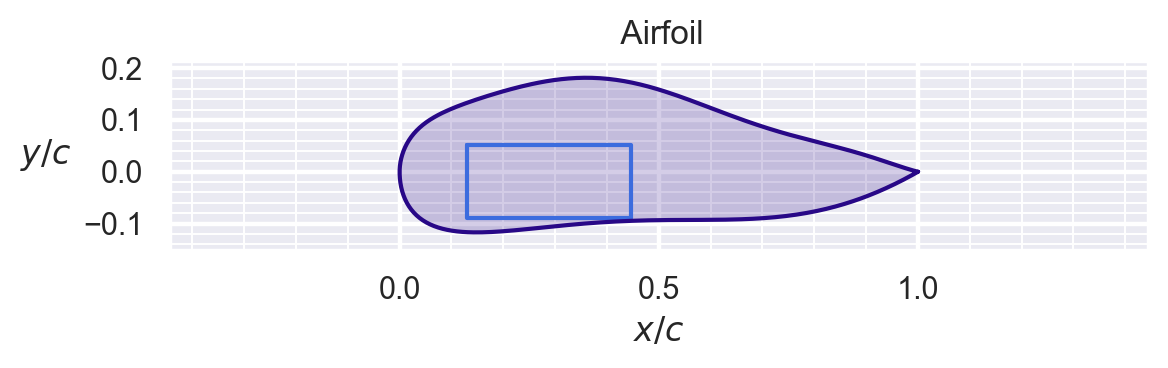

Step: 15, Action: [ 0.996565    1.          0.5378364  -0.45929778 -0.7995472   1.
 -1.          1.          0.9129211  -0.0465551  -1.          0.67325884
 -0.79343355  0.98328865 -1.          1.          0.3825596 ], Reward: 53.90586835771259, Done: False, Info: {'step': 6, 'efficiency': 54.61524060063054, 'cl': 0.47443280541319}
Obs: [ 0.60599434  0.41469505  0.5820596   0.5119686   0.48244563  0.1
  0.4         0.4        -0.42122865 -0.36381835 -0.36490154 -0.1230529
 -0.30734968 -0.23371188 -0.6258382  -0.42158154  0.28769913]


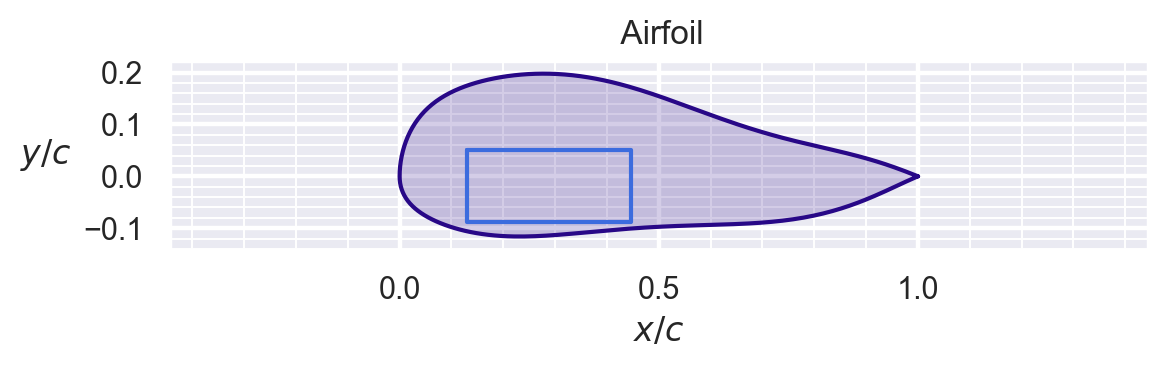

Step: 16, Action: [-1.         -1.         -0.61944973  0.24747731  1.         -1.
  1.         -1.         -1.          0.12986052  1.         -1.
  1.         -1.          1.         -1.         -0.5661555 ], Reward: 56.612318134890785, Done: False, Info: {'step': 7, 'efficiency': 56.795654054793516, 'cl': 0.48728541534726333}
Obs: [ 0.45599434  0.26469505  0.48914215  0.5490902   0.63244563 -0.05
  0.55        0.25       -0.5712287  -0.34433925 -0.21490154 -0.2730529
 -0.15734969 -0.3837119  -0.4758382  -0.57158154  0.20277579]


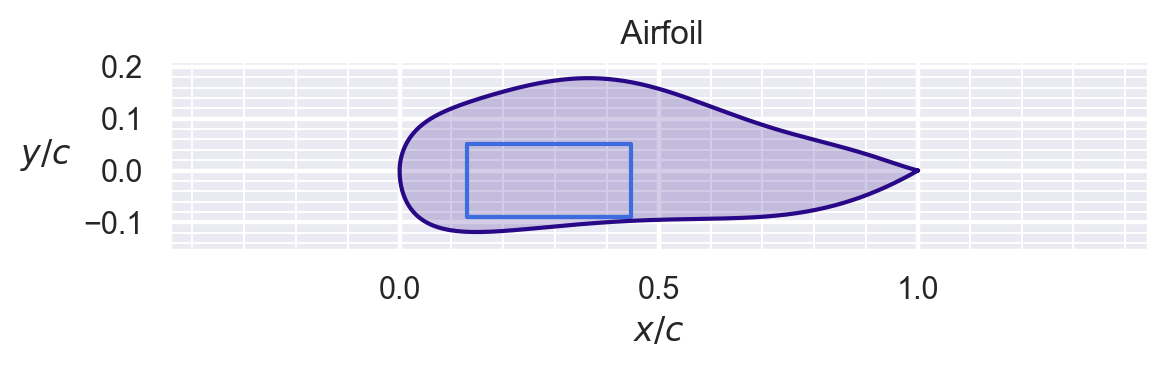

Step: 17, Action: [ 1.          1.          0.70468783 -0.33804488 -0.87421024  1.
 -1.          1.          1.         -0.02559194 -1.          1.
 -0.91254663  0.9021681  -1.          1.          0.5258557 ], Reward: 55.49283758809923, Done: False, Info: {'step': 8, 'efficiency': 55.67548856931409, 'cl': 0.48718198820450087}
Obs: [ 0.60599434  0.41469505  0.59484535  0.4983835   0.5013141   0.1
  0.4         0.4        -0.42122865 -0.34817806 -0.36490154 -0.1230529
 -0.29423168 -0.24838667 -0.6258382  -0.42158154  0.28165415]


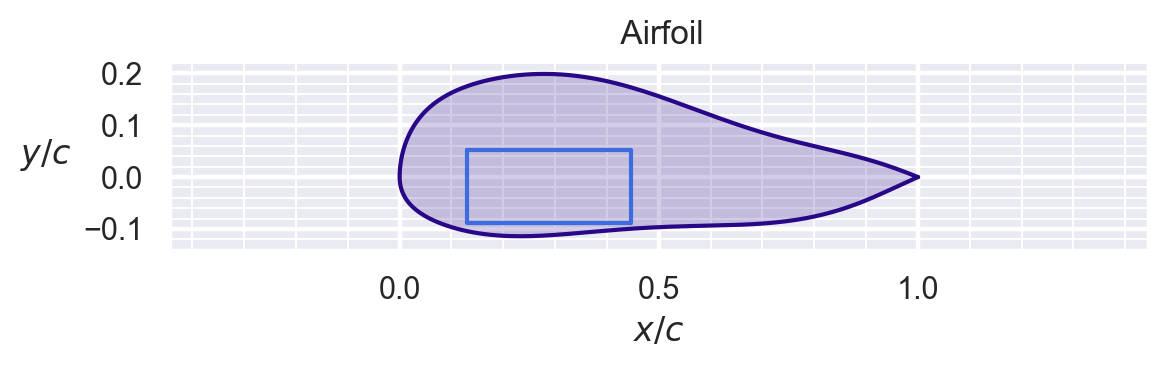

Step: 18, Action: [-1.         -1.         -0.6586127   0.24348651  0.9530374  -1.
  1.         -1.         -1.          0.1026639   1.         -1.
  1.         -0.94207436  1.         -1.         -0.63540226], Reward: 57.44962792198415, Done: False, Info: {'step': 9, 'efficiency': 57.49161861814587, 'cl': 0.49395580321237387}
Obs: [ 0.45599434  0.26469505  0.49605343  0.53490645  0.6442697  -0.05
  0.55        0.25       -0.5712287  -0.33277848 -0.21490154 -0.2730529
 -0.14423169 -0.38969782 -0.4758382  -0.57158154  0.1863438 ]


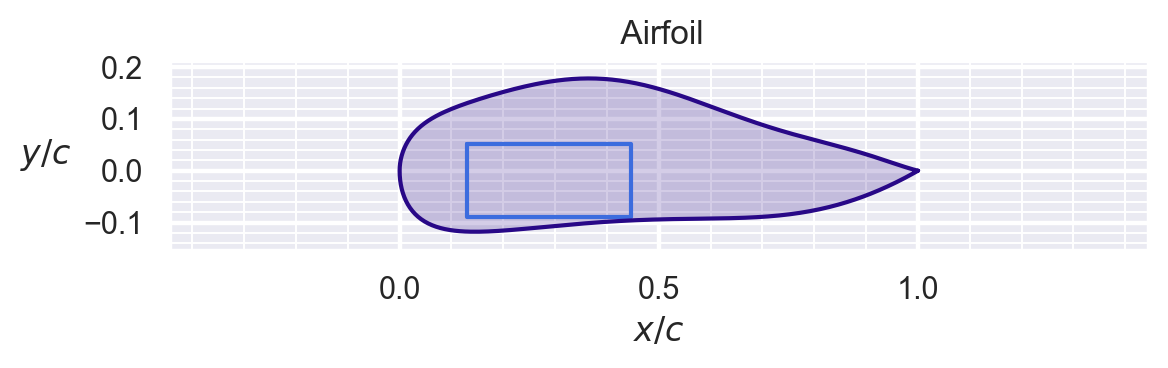

Step: 19, Action: [ 1.          1.          0.6865     -0.26722664 -0.9063331   1.
 -1.          1.          0.97345746 -0.1026445  -1.          1.
 -1.          0.9861404  -1.          1.          0.49422395], Reward: 55.857344479647615, Done: True, Info: {'step': 10, 'efficiency': 56.02190013221102, 'cl': 0.487872206421589}
Obs: [ 0.60599434  0.41469505  0.5990284   0.49482247  0.50831974  0.1
  0.4         0.4        -0.42521003 -0.34817514 -0.36490154 -0.1230529
 -0.29423168 -0.24177676 -0.6258382  -0.42158154  0.2604774 ]


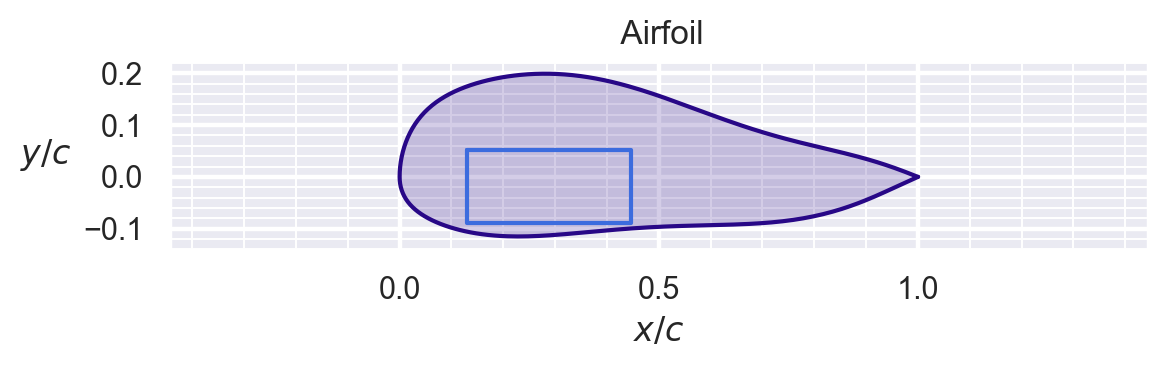

In [15]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, done, _, info = env.step(action)
    
    print(f"Step: {i}, Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")
    print(f"Obs: {obs['airfoil']}")
    env.render()

    if done:
        obs, _ = env.reset()

